In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
C:\Users\matheus\AppData\Local\Continuum\anaconda3\envs\personal\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
data = pd.read_csv('espn-nba-players-data/NBA_Players.csv',sep=',')

In [3]:
data.columns = data.columns.str.replace(' ', '')

In [4]:
data.dtypes

TEAM                object
NAME                object
EXPERIENCE           int64
URL                 object
POSITION            object
AGE                 object
HT                 float64
WT                 float64
COLLEGE             object
SALARY              object
PPG_LAST_SEASON    float64
APG_LAST_SEASON    float64
RPG_LAST_SEASON    float64
PER_LAST_SEASON    float64
PPG_CAREER         float64
APG_CAREER         float64
RGP_CAREER         float64
GP                   int64
MPG                float64
FGM_FGA             object
FGP                float64
THM_THA             object
THP                float64
FTM_FTA             object
FTP                float64
APG                float64
BLKPG              float64
STLPG              float64
TOPG               float64
PPG                float64
dtype: object

In [5]:
dados_preproc = data.loc[data['SALARY'] != 'Not signed']

In [6]:
dados_preproc['SALARY'] = dados_preproc['SALARY'].apply(lambda x: float(x.replace(',','')))

<ipython-input-6-3e53da1dcb8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_preproc['SALARY'] = dados_preproc['SALARY'].apply(lambda x: float(x.replace(',','')))


In [7]:
dados_preproc['SALARY'] 

0       5193600.0
2       1349464.0
3       5169960.0
6      31214295.0
7      28928709.0
          ...    
545     1512601.0
546     1378242.0
547    14975000.0
548     5250000.0
549     3360000.0
Name: SALARY, Length: 440, dtype: float64

# Pergunta: O salário do Stephen Curry se justifica?

### Critérios de avaliação (ou, definição de "justo" p/ análise):
 - Performance individual vs. Salário;
 - Performance do time vs. Salário;
 - Income c/ merchandising vs. Salário;

In [8]:
dados_preproc.describe()

,EXPERIENCE,HT,WT,SALARY,PPG_LAST_SEASON,APG_LAST_SEASON,RPG_LAST_SEASON,PER_LAST_SEASON,PPG_CAREER,APG_CAREER,...,GP,MPG,FGP,THP,FTP,APG,BLKPG,STLPG,TOPG,PPG
count,440.000000,440.000000,440.000000,4.400000e+02,436.000000,436.000000,436.000000,436.000000,440.000000,440.000000,...,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,4.836364,201.012136,99.085932,7.790095e+06,8.801606,3.204817,2.041972,12.558165,8.383409,3.162500,...,306.943182,19.799318,0.400973,0.265864,0.651170,1.794545,0.407273,0.650227,1.134773,8.383409
std,4.200070,8.574265,10.808057,7.987297e+06,6.447391,2.828996,1.884213,6.604998,5.679762,2.679523,...,291.215220,10.170661,0.159981,0.150683,0.264342,1.698295,0.424202,0.431293,0.798914,5.679762
min,0.000000,175.260000,76.920000,8.384640e+05,0.000000,0.000000,0.000000,-3.190000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,195.580000,90.500000,1.621181e+06,4.100000,1.000000,0.475000,9.425000,4.675000,1.100000,...,65.500000,14.775000,0.405750,0.195500,0.648250,0.700000,0.100000,0.400000,0.600000,4.675000
50%,4.000000,200.660000,99.325000,4.335250e+06,7.900000,2.500000,1.650000,13.145000,7.600000,2.400000,...,223.500000,21.250000,0.440000,0.332000,0.750000,1.300000,0.300000,0.600000,1.000000,7.600000
75%,7.250000,208.280000,107.240000,1.170673e+07,12.800000,4.725000,3.100000,16.492500,11.825000,4.800000,...,482.250000,27.725000,0.477250,0.364250,0.802000,2.400000,0.525000,0.900000,1.525000,11.825000
max,20.000000,220.980000,131.220000,3.745715e+07,30.400000,16.000000,12.300000,29.870000,27.200000,13.400000,...,1471.000000,38.800000,0.731000,1.000000,1.000000,9.800000,2.400000,2.300000,4.000000,27.200000


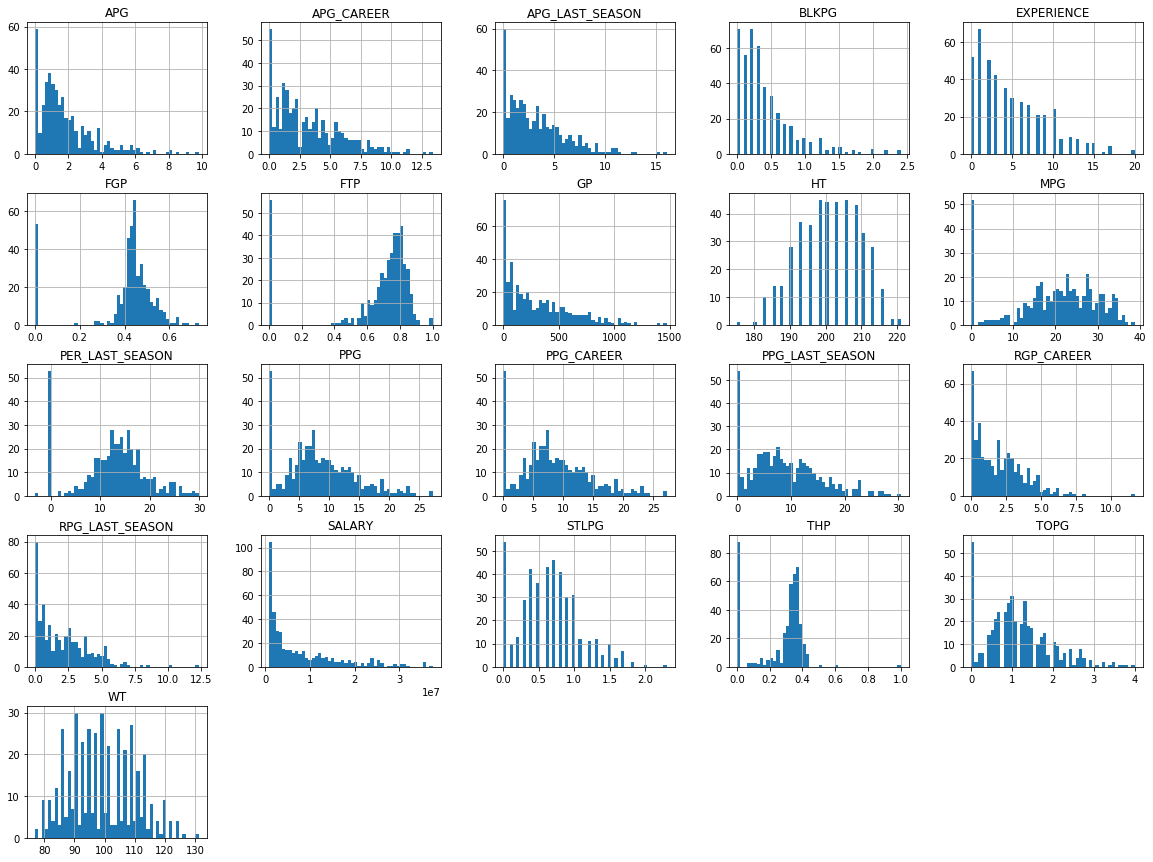

In [9]:
g = dados_preproc.hist(bins=50, figsize=(20,15)) # Histograms

#### Análise de Performance Individual

##### Variáveis que melhor explicam o salário:

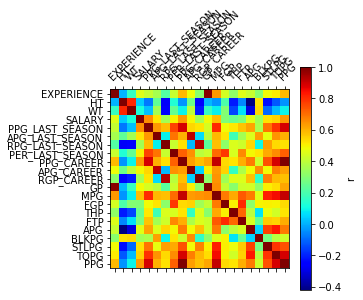

In [14]:
corr_matrix = dados_preproc.corr()
cm=plt.get_cmap('jet') # viridis,inferno,plasma
columns=list(corr_matrix.columns)
g=plt.matshow(corr_matrix,cmap=cm)

cbar=plt.colorbar()
cbar.ax.set_ylabel('r')
ax = plt.gca() # get the current axes
ax.set_xticks(range(len(columns)))
ax.set_yticks(range(len(columns)))
ax.set_xticklabels(columns)
ax.set_yticklabels(columns)

# Rotate the tick labels and set their alignment
r=plt.setp(ax.get_xticklabels(), rotation=45, ha="left", rotation_mode="anchor")

In [16]:
corr_matrix['SALARY'].sort_values(ascending=False)

SALARY             1.000000
PPG_LAST_SEASON    0.655676
PPG                0.637857
PPG_CAREER         0.637857
MPG                0.585688
TOPG               0.553108
STLPG              0.532473
APG_LAST_SEASON    0.522945
PER_LAST_SEASON    0.504795
APG_CAREER         0.496936
GP                 0.491710
APG                0.464909
EXPERIENCE         0.460116
RPG_LAST_SEASON    0.360474
RGP_CAREER         0.357432
BLKPG              0.351777
FGP                0.295773
FTP                0.291781
THP                0.260267
WT                 0.126763
HT                 0.043632
Name: SALARY, dtype: float64